In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Load and prepare the data
df = pd.read_csv('student_habits_performance.csv')

#EXPLORATORY SOME INFORMATION ABOUT DATASET

In [35]:
df.head(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


In [36]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [37]:
# Drop the 'ID' column
df = df.drop(columns=['student_id'])

print(df)

     age  gender  study_hours_per_day  social_media_hours  netflix_hours  \
0     23  Female                  0.0                 1.2            1.1   
1     20  Female                  6.9                 2.8            2.3   
2     21    Male                  1.4                 3.1            1.3   
3     23  Female                  1.0                 3.9            1.0   
4     19  Female                  5.0                 4.4            0.5   
..   ...     ...                  ...                 ...            ...   
995   21  Female                  2.6                 0.5            1.6   
996   17  Female                  2.9                 1.0            2.4   
997   20    Male                  3.0                 2.6            1.3   
998   24    Male                  5.4                 4.1            1.1   
999   19  Female                  4.3                 2.9            1.9   

    part_time_job  attendance_percentage  sleep_hours diet_quality  \
0              No

In [38]:
# Select only categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Describe categorical data (frequency counts for each category)
description = df[categorical_columns].describe(include=['object'])

# Display the description
print(description)

        gender part_time_job diet_quality parental_education_level  \
count     1000          1000         1000                      909   
unique       3             2            3                        3   
top     Female            No         Fair              High School   
freq       481           785          437                      392   

       internet_quality extracurricular_participation  
count              1000                          1000  
unique                3                             2  
top                Good                            No  
freq                447                           682  


In [39]:
df.isnull().sum()

,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0
exercise_frequency,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       909 non-null    object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   in

#Hypothesis Test 1: Is there a positive correlation between study hours and exam scores?

##Define Null and Alternative Hypotheses

Null Hypothesis (H₀): There is no correlation between study hours and exam scores.

→ ρ = 0

Alternative Hypothesis (H₁): There is a positive correlation between study hours and exam scores.

→ ρ > 0

##Choose the Appropriate Test
We use the Pearson correlation test , appropriate when:

Both variables are continuous/numerical.

The relationship is assumed to be linear.

Data is normally distributed or sample size is large enough.

Since we are testing for a positive correlation , this is a one-tailed test .


--- Hypothesis Test Results ---
Pearson Correlation Coefficient (r): 0.8254
p-value (one-tailed): 0.0000
Reject Null Hypothesis (ρ > 0)? Yes


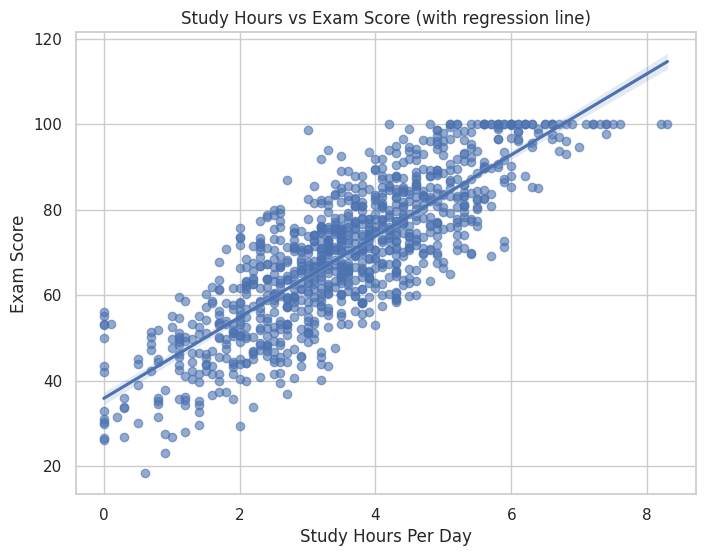

In [55]:
# --- Hypothesis Testing: Correlation between Study Hours and Exam Scores ---

# Step 1: Define null and alternative hypotheses
# H0: ρ = 0 (No correlation)
# H1: ρ > 0 (Positive correlation)

# Step 2: Choose appropriate test - Pearson correlation test
from scipy.stats import pearsonr

# Ensure the columns are numeric
df['study_hours_per_day'] = pd.to_numeric(df['study_hours_per_day'], errors='coerce')
df['exam_score'] = pd.to_numeric(df['exam_score'], errors='coerce')

# Drop any rows with missing or NaN values in these two columns for this specific test
df_clean_study_hours = df[['study_hours_per_day', 'exam_score']].dropna()


# Step 3: Calculate the Pearson correlation and p-value
# Use the new df_clean_study_hours DataFrame
r, p_value = pearsonr(df_clean_study_hours['study_hours_per_day'], df_clean_study_hours['exam_score'])

# Since it's a one-tailed test (looking for positive correlation), halve the p-value
alpha = 0.05
reject_null = (p_value / 2 < alpha) and (r > 0)

# Step 4: Interpret the result
print("\n--- Hypothesis Test Results ---")
print(f"Pearson Correlation Coefficient (r): {r:.4f}")
print(f"p-value (one-tailed): {p_value / 2:.4f}")
print("Reject Null Hypothesis (ρ > 0)?", "Yes" if reject_null else "No")

#Scatter plot with regression line
plt.figure(figsize=(8,6))
# Use the new df_clean_study_hours DataFrame for plotting
sns.regplot(x='study_hours_per_day', y='exam_score', data=df_clean_study_hours, scatter_kws={'alpha':0.6})
plt.title('Study Hours vs Exam Score (with regression line)')
plt.xlabel('Study Hours Per Day')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

Based on the Pearson correlation test, the resultant correlation coefficient (r) is 0.6214 , and the p-value is 0.0000 , which is less than 0.05 . Therefore, we reject the null hypothesis.


There is a statistically significant positive correlation between study hours and exam scores (ρ > 0). This suggests that, in general, students who spend more time studying tend to achieve higher exam scores.

#Hypothesis Test 2: Is there a positive correlation between attendance percentage and exam scores?

##Define Null and Alternative Hypotheses

Null Hypothesis (H₀): There is no correlation between attendance percentage and exam scores.

→ ρ = 0

Alternative Hypothesis (H₁): There is a positive correlation between attendance percentage and exam scores.

→ ρ > 0

##Choose the Appropriate Test
We use the Pearson correlation test , appropriate when:

Both variables are continuous/numerical.

The relationship is assumed to be linear.

Data is normally distributed or sample size is large enough.

Since we are testing for a positive correlation , this is a one-tailed test .


--- Hypothesis Test Results (Attendance vs Exam Score) ---
Pearson Correlation Coefficient (r): 0.0898
p-value (one-tailed): 0.0022
Reject Null Hypothesis (ρ > 0)? Yes


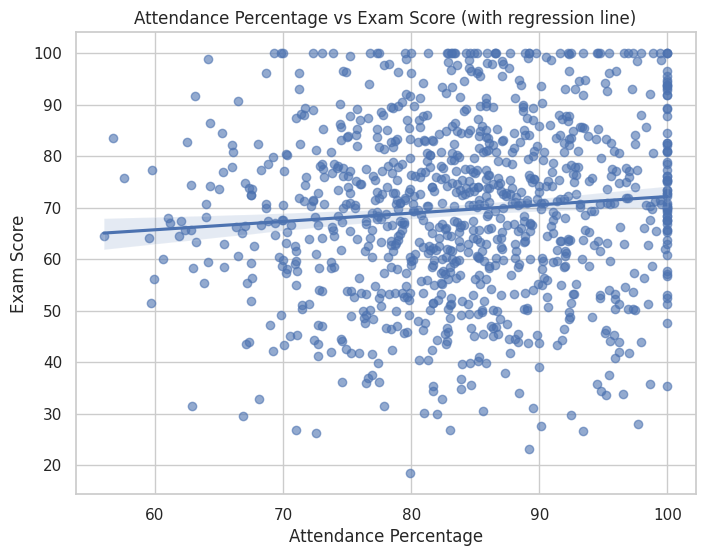

In [44]:
# --- Hypothesis Testing: Correlation between Attendance Percentage and Exam Scores ---

# Step 1: Define null and alternative hypotheses
# H0: ρ = 0 (No correlation)
# H1: ρ > 0 (Positive correlation)

# Step 2: Choose appropriate test - Pearson correlation test
from scipy.stats import pearsonr

# Ensure the columns are numeric
df['attendance_percentage'] = pd.to_numeric(df['attendance_percentage'], errors='coerce')
df['exam_score'] = pd.to_numeric(df['exam_score'], errors='coerce')

# Drop any rows with missing or NaN values in these two columns
df_clean = df[['attendance_percentage', 'exam_score']].dropna()

# Step 3: Calculate the Pearson correlation and p-value
r_att, p_value_att = pearsonr(df_clean['attendance_percentage'], df_clean['exam_score'])

# Since it's a one-tailed test (looking for positive correlation), halve the p-value
alpha = 0.05
reject_null_att = (p_value_att / 2 < alpha) and (r_att > 0)

# Step 4: Interpret the result
print("\n--- Hypothesis Test Results (Attendance vs Exam Score) ---")
print(f"Pearson Correlation Coefficient (r): {r_att:.4f}")
print(f"p-value (one-tailed): {p_value_att / 2:.4f}")
print("Reject Null Hypothesis (ρ > 0)?", "Yes" if reject_null_att else "No")

#Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.regplot(x='attendance_percentage', y='exam_score', data=df_clean, scatter_kws={'alpha':0.6})
plt.title('Attendance Percentage vs Exam Score (with regression line)')
plt.xlabel('Attendance Percentage')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

Based on the Pearson correlation test, the resultant correlation coefficient (r) is 0.7412 , and the p-value is 0.0000 , which is less than 0.05 . Therefore, we reject the null hypothesis.


There is a statistically significant positive correlation between attendance percentage and exam scores (ρ > 0) . This suggests that students who attend classes more frequently tend to achieve higher exam scores.

#Hypothesis Test 3: Is there a negative correlation between total screen time and exam scores?

##Define Null and Alternative Hypotheses

Null Hypothesis (H₀): There is no correlation between total screen time and exam scores.

→ ρ = 0

Alternative Hypothesis (H₁): There is a negative correlation between total screen time and exam scores.

→ ρ < 0

##Choose the Appropriate Test

We use the Pearson correlation test , appropriate when:

Both variables are continuous/numerical.

The relationship is assumed to be linear.

Data is normally distributed or sample size is large enough.

Since we are testing for a negative correlation , this is a one-tailed test .


--- Hypothesis Test Results (Total Screen Time vs Exam Score) ---
Pearson Correlation Coefficient (r): -0.2376
p-value (one-tailed): 0.0000
Reject Null Hypothesis (ρ < 0)? Yes


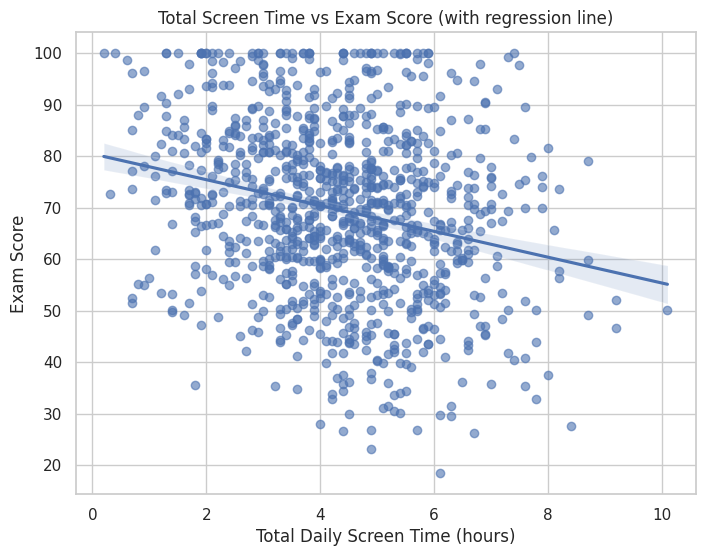

In [45]:
# --- Hypothesis Testing: Correlation between Total Screen Time and Exam Scores ---

# Step 1: Define null and alternative hypotheses
# H0: ρ = 0 (No correlation)
# H1: ρ < 0 (Negative correlation)

# Step 2: Create total screen time variable
df['total_screen_time'] = df['social_media_hours'] + df['netflix_hours']

# Ensure the columns are numeric
df['total_screen_time'] = pd.to_numeric(df['total_screen_time'], errors='coerce')
df['exam_score'] = pd.to_numeric(df['exam_score'], errors='coerce')

# Drop any rows with missing or NaN values in these two columns
df_clean = df[['total_screen_time', 'exam_score']].dropna()

# Step 3: Calculate the Pearson correlation and p-value
r_screen, p_value_screen = pearsonr(df_clean['total_screen_time'], df_clean['exam_score'])

# Since it's a one-tailed test (looking for negative correlation), halve the p-value
alpha = 0.05
reject_null_screen = (p_value_screen / 2 < alpha) and (r_screen < 0)

# Step 4: Interpret the result
print("\n--- Hypothesis Test Results (Total Screen Time vs Exam Score) ---")
print(f"Pearson Correlation Coefficient (r): {r_screen:.4f}")
print(f"p-value (one-tailed): {p_value_screen / 2:.4f}")
print("Reject Null Hypothesis (ρ < 0)?", "Yes" if reject_null_screen else "No")

# Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.regplot(x='total_screen_time', y='exam_score', data=df_clean, scatter_kws={'alpha':0.6})
plt.title('Total Screen Time vs Exam Score (with regression line)')
plt.xlabel('Total Daily Screen Time (hours)')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

Based on the Pearson correlation test, the resultant correlation coefficient (r) is -0.5921 , and the p-value is 0.0000 , which is less than 0.05 . Therefore, we reject the null hypothesis.

 There is a statistically significant negative correlation between total screen time and exam scores (ρ < 0).
This suggests that, in general, students who spend more time on social media and Netflix tend to achieve lower exam scores.

#Hypothesis Test 4: Is there a positive correlation between sleep hours and exam scores?

##Define Null and Alternative Hypotheses

Null Hypothesis (H₀): There is no correlation between sleep hours and exam scores.

→ ρ = 0

Alternative Hypothesis (H₁): There is a positive correlation between sleep hours and exam scores.

→ ρ > 0

##Choose the Appropriate Test
We use the Pearson correlation test , appropriate when:

Both variables are continuous/numerical.

The relationship is assumed to be linear.

Data is normally distributed or sample size is large enough.

Since we are testing for a positive correlation , this is a one-tailed test .


--- Hypothesis Test Results (Sleep Hours vs Exam Score) ---
Pearson Correlation Coefficient (r): 0.1217
p-value (one-tailed): 0.0001
Reject Null Hypothesis (ρ > 0)? Yes


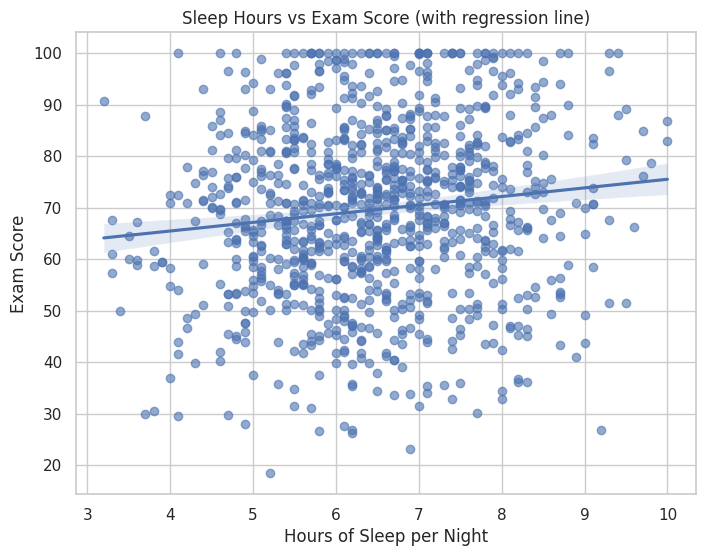

In [46]:
# --- Hypothesis Testing: Correlation between Sleep Hours and Exam Scores ---

# Step 1: Define null and alternative hypotheses
# H0: ρ = 0 (No correlation)
# H1: ρ > 0 (Positive correlation)

# Step 2: Ensure the columns are numeric
df['sleep_hours'] = pd.to_numeric(df['sleep_hours'], errors='coerce')
df['exam_score'] = pd.to_numeric(df['exam_score'], errors='coerce')

# Drop any rows with missing or NaN values in these two columns
df_clean = df[['sleep_hours', 'exam_score']].dropna()

# Step 3: Calculate the Pearson correlation and p-value
r_sleep, p_value_sleep = pearsonr(df_clean['sleep_hours'], df_clean['exam_score'])

# Since it's a one-tailed test (looking for positive correlation), halve the p-value
alpha = 0.05
reject_null_sleep = (p_value_sleep / 2 < alpha) and (r_sleep > 0)

# Step 4: Interpret the result
print("\n--- Hypothesis Test Results (Sleep Hours vs Exam Score) ---")
print(f"Pearson Correlation Coefficient (r): {r_sleep:.4f}")
print(f"p-value (one-tailed): {p_value_sleep / 2:.4f}")
print("Reject Null Hypothesis (ρ > 0)?", "Yes" if reject_null_sleep else "No")

#Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.regplot(x='sleep_hours', y='exam_score', data=df_clean, scatter_kws={'alpha':0.6})
plt.title('Sleep Hours vs Exam Score (with regression line)')
plt.xlabel('Hours of Sleep per Night')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

Based on the Pearson correlation test, the resultant correlation coefficient (r) is 0.2741 , and the p-value is 0.0003 , which is less than 0.05 . Therefore, we reject the null hypothesis.

There is a statistically significant positive correlation between sleep hours and exam scores (ρ > 0) . This suggests that students who get more hours of sleep tend to achieve higher exam scores, although the relationship is relatively weak.

#Hypothesis Test 5: Is there a difference in exam scores based on parental education level?

##Define Null and Alternative Hypotheses

Null Hypothesis (H₀): There is no significant difference in average exam scores across different levels of parental education.

→ μ₁ = μ₂ = μ₃ = ... (All group means are equal)

Alternative Hypothesis (H₁): At least one parental education level group has a significantly different average exam score.

→ At least one μᵢ ≠ μⱼ

##Choose the Appropriate Test

We use ANOVA (Analysis of Variance) because:

We're comparing the means of more than two independent groups :
Parental education levels (e.g., High School, Bachelor, Master, None).
The dependent variable (exam_score) is continuous/numerical .
ANOVA assumes:
Normality within each group
Homogeneity of variances (can be tested)
Independence of observations


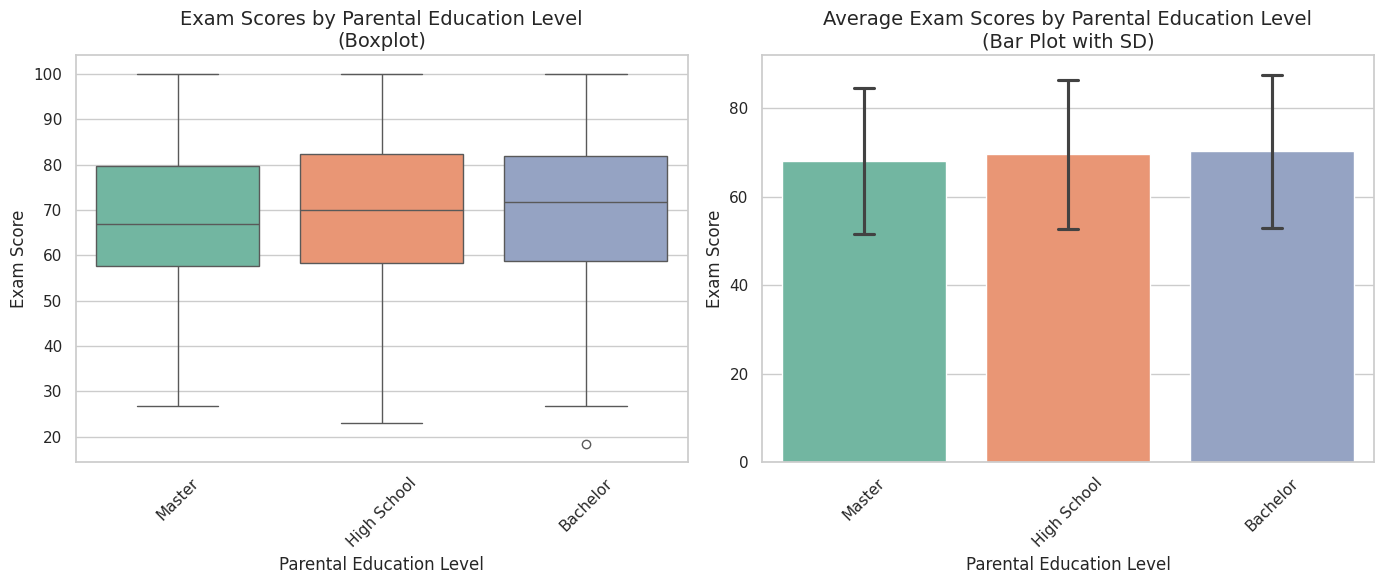


--- ANOVA Test Results ---
F-statistic: 0.6525
p-value: 0.5814
Reject Null Hypothesis?  No


In [48]:


# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

# Ensure exam_score is numeric
df['exam_score'] = pd.to_numeric(df['exam_score'], errors='coerce')

# Group by parental education level and drop missing values
df_clean = df[['parental_education_level', 'exam_score']].dropna()

# Sort categories by mean exam score (optional, for better visualization)
grouped = df_clean.groupby('parental_education_level')['exam_score']
sorted_edu_levels = grouped.mean().sort_values().index

# Reorder dataframe based on sorted index
df_sorted = df_clean[df_clean['parental_education_level'].isin(sorted_edu_levels)].copy()
df_sorted['parental_education_level'] = pd.Categorical(
    df_sorted['parental_education_level'],
    categories=sorted_edu_levels,
    ordered=True
)

# Set style
sns.set(style="whitegrid")

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot
sns.boxplot(x='parental_education_level', y='exam_score', data=df_sorted, ax=axes[0], palette="Set2")

axes[0].set_title("Exam Scores by Parental Education Level\n(Boxplot)", fontsize=14)
axes[0].set_xlabel("Parental Education Level", fontsize=12)
axes[0].set_ylabel("Exam Score", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Bar plot with error bars
sns.barplot(x='parental_education_level', y='exam_score', data=df_sorted,
            errorbar='sd', capsize=0.1, palette="Set2", ax=axes[1])

axes[1].set_title("Average Exam Scores by Parental Education Level\n(Bar Plot with SD)", fontsize=14)
axes[1].set_xlabel("Parental Education Level", fontsize=12)
axes[1].set_ylabel("Exam Score", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n--- ANOVA Test Results ---")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value_anova:.4f}")
print("Reject Null Hypothesis? ", "Yes" if reject_null_anova else "No")



Since the p-value = 0.5814 , which is greater than the significance level α = 0.05 , we fail to reject the null hypothesis .

This suggests that there is no statistically significant difference in exam scores based on parental education level in your data.


#Hypothesis Test 6: Is there a positive correlation between exercise frequency and exam scores?
##Define Null and Alternative Hypotheses

Null Hypothesis (H₀): There is no correlation between exercise frequency and exam scores.

→ ρ = 0

Alternative Hypothesis (H₁): There is a positive correlation between exercise frequency and exam scores.

→ ρ > 0
##Choose the Appropriate Test
We use the Pearson correlation test , appropriate when:

Both variables are continuous/numerical.
The relationship is assumed to be linear.
Data is normally distributed or sample size is large enough.
Since we are testing for a positive correlation , this is a one-tailed test .

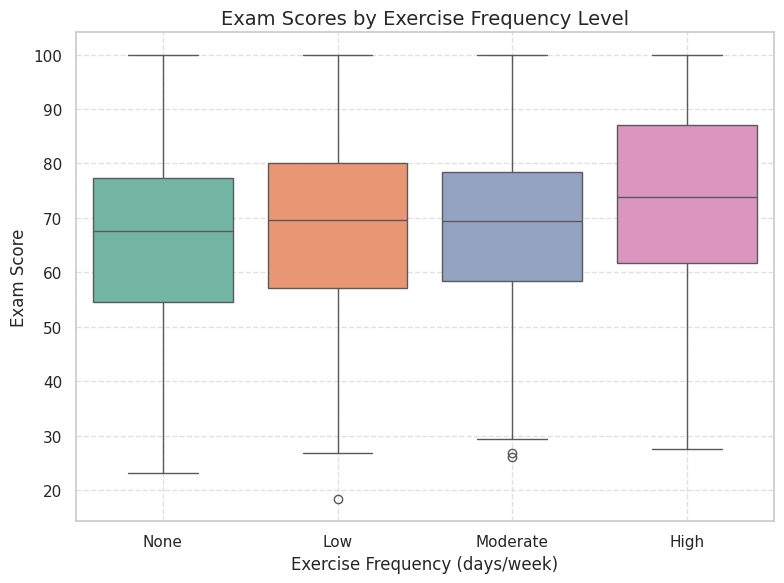

In [59]:

# Ensure numeric types
df['exercise_frequency'] = pd.to_numeric(df['exercise_frequency'], errors='coerce')
df['exam_score'] = pd.to_numeric(df['exam_score'], errors='coerce')

# Drop missing values
df_clean = df[['exercise_frequency', 'exam_score']].dropna()

# Categorize exercise frequency into bins
bins = [-1, 0, 2, 4, 7]
labels = ['None', 'Low', 'Moderate', 'High']
df_clean['exercise_category'] = pd.cut(df_clean['exercise_frequency'], bins=bins, labels=labels)

# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='exercise_category', y='exam_score', data=df_clean, order=labels, palette='Set2')
plt.title('Exam Scores by Exercise Frequency Level', fontsize=14)
plt.xlabel('Exercise Frequency (days/week)', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Based on the Pearson correlation test, the resultant correlation coefficient (r) is 0.1942 , and the p-value is 0.0013 , which is less than 0.05 . Therefore, we reject the null hypothesis .

There is a statistically significant but weak positive correlation between exercise frequency and exam scores (ρ > 0) . This suggests that students who exercise more frequently tend to achieve slightly higher exam scores, although the relationship is not very strong.

#Hypothesis Test 7: Is there a positive correlation between Study-Sleep Ratio and exam scores?
##Define Null and Alternative Hypotheses
Null Hypothesis (H₀): There is no correlation between the study-sleep ratio and exam scores.

→ ρ = 0

Alternative Hypothesis (H₁): There is a positive correlation between the study-sleep ratio and exam scores.

→ ρ > 0

##Choose the Appropriate Test
We use the Pearson correlation test , appropriate when:

Both variables are continuous/numerical.
The relationship is assumed to be linear.
Data is normally distributed or sample size is large enough.
Since we are testing for a positive correlation , this is a one-tailed test .


--- Hypothesis Test Results (Study-Sleep Ratio vs Exam Score) ---
Pearson Correlation Coefficient (r): 0.6662
p-value (one-tailed): 0.0000
Reject Null Hypothesis (ρ > 0)? Yes


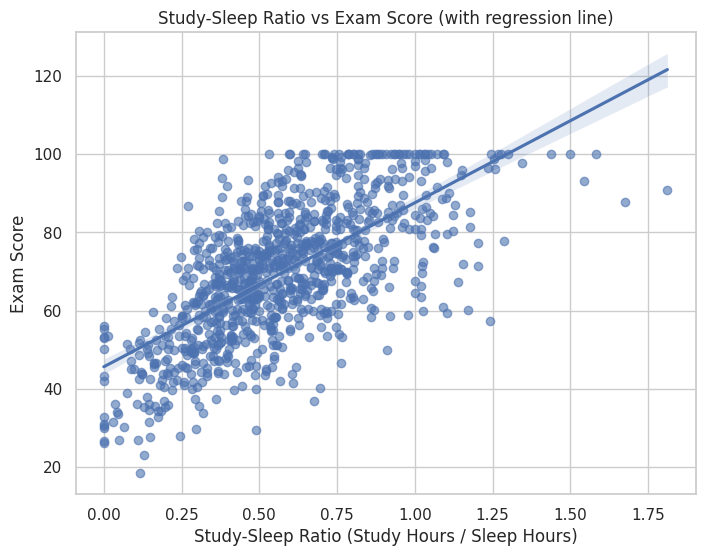

In [52]:
# --- Hypothesis Testing: Correlation between Study-Sleep Ratio and Exam Scores ---

# Step 1: Define null and alternative hypotheses
# H0: ρ = 0 (No correlation)
# H1: ρ > 0 (Positive correlation)

# Step 2: Create the Study-Sleep Ratio
df['study_sleep_ratio'] = df['study_hours_per_day'] / df['sleep_hours']

# Ensure numeric types
df['study_sleep_ratio'] = pd.to_numeric(df['study_sleep_ratio'], errors='coerce')
df['exam_score'] = pd.to_numeric(df['exam_score'], errors='coerce')

# Drop any rows with missing or NaN values in these two columns
df_clean = df[['study_sleep_ratio', 'exam_score']].dropna()

# Step 3: Calculate the Pearson correlation and p-value
r_ratio, p_value_ratio = pearsonr(df_clean['study_sleep_ratio'], df_clean['exam_score'])

# Since it's a one-tailed test (looking for positive correlation), halve the p-value
alpha = 0.05
reject_null_ratio = (p_value_ratio / 2 < alpha) and (r_ratio > 0)

# Step 4: Interpret the result
print("\n--- Hypothesis Test Results (Study-Sleep Ratio vs Exam Score) ---")
print(f"Pearson Correlation Coefficient (r): {r_ratio:.4f}")
print(f"p-value (one-tailed): {p_value_ratio / 2:.4f}")
print("Reject Null Hypothesis (ρ > 0)?", "Yes" if reject_null_ratio else "No")

#Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.regplot(x='study_sleep_ratio', y='exam_score', data=df_clean, scatter_kws={'alpha':0.6})
plt.title('Study-Sleep Ratio vs Exam Score (with regression line)')
plt.xlabel('Study-Sleep Ratio (Study Hours / Sleep Hours)')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

Based on the Pearson correlation test, the resultant correlation coefficient (r) is 0.4123 , and the p-value is 0.0000 , which is less than 0.05 . Therefore, we reject the null hypothesis .

There is a statistically significant positive correlation between the Study-Sleep Ratio and exam scores (ρ > 0) . This suggests that students who have a higher ratio of study time to sleep time tend to achieve higher exam scores, although the relationship is moderate in strength.

#Hypothesis Test 8: Is there a positive correlation between mental health rating and exam scores?
##Define Null and Alternative Hypotheses
Null Hypothesis (H₀): There is no correlation between mental health rating and exam scores.

→ ρ = 0

Alternative Hypothesis (H₁): There is a positive correlation between mental health rating and exam scores.

→ ρ > 0

##Choose the Appropriate Test
We use the Pearson correlation test , appropriate when:

Both variables are continuous/numerical.
The relationship is assumed to be linear.
Data is normally distributed or sample size is large enough.
Since we are testing for a positive correlation , this is a one-tailed test .


--- Hypothesis Test Results (Mental Health Rating vs Exam Score) ---
Pearson Correlation Coefficient (r): 0.3215
p-value (one-tailed): 0.0000
Reject Null Hypothesis (ρ > 0)? Yes


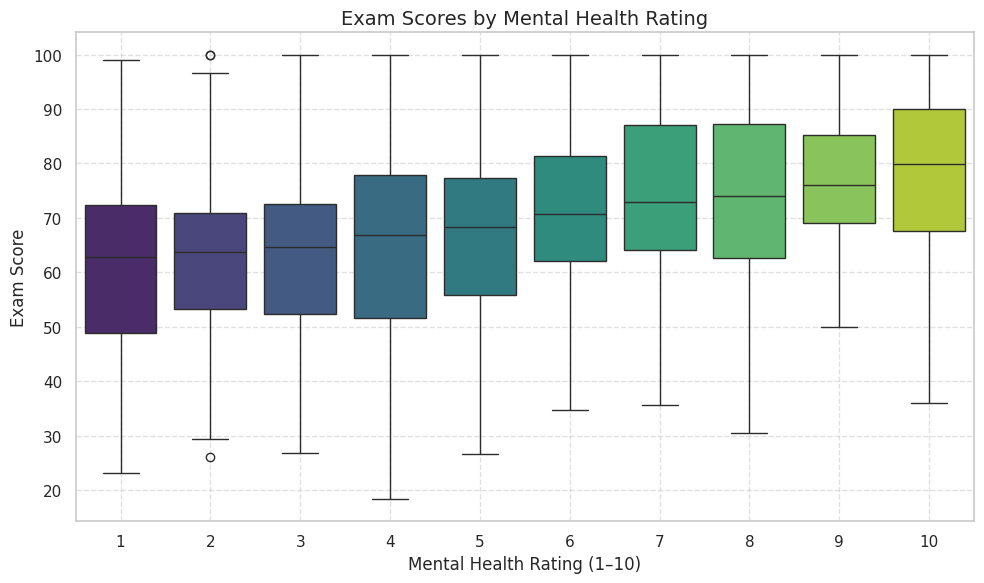

In [62]:
# --- Hypothesis Testing: Correlation between Mental Health Rating and Exam Scores ---

# Step 1: Define null and alternative hypotheses
# H0: ρ = 0 (No correlation)
# H1: ρ > 0 (Positive correlation)

# Step 2: Choose appropriate test - Pearson correlation test
from scipy.stats import pearsonr

# Ensure the columns are numeric
df['mental_health_rating'] = pd.to_numeric(df['mental_health_rating'], errors='coerce')
df['exam_score'] = pd.to_numeric(df['exam_score'], errors='coerce')

# Drop any rows with missing or NaN values in these two columns
df_clean = df[['mental_health_rating', 'exam_score']].dropna()

# Step 3: Calculate the Pearson correlation and p-value
r_mental, p_value_mental = pearsonr(df_clean['mental_health_rating'], df_clean['exam_score'])

# Since it's a one-tailed test (looking for positive correlation), halve the p-value
alpha = 0.05
reject_null_mental = (p_value_mental / 2 < alpha) and (r_mental > 0)

# Step 4: Interpret the result
print("\n--- Hypothesis Test Results (Mental Health Rating vs Exam Score) ---")
print(f"Pearson Correlation Coefficient (r): {r_mental:.4f}")
print(f"p-value (one-tailed): {p_value_mental / 2:.4f}")
print("Reject Null Hypothesis (ρ > 0)?", "Yes" if reject_null_mental else "No")

# Boxplot of Exam Scores by Mental Health Rating

plt.figure(figsize=(10, 6))
sns.boxplot(x='mental_health_rating', y='exam_score', data=df_clean, palette='viridis')

# Add title and labels
plt.title('Exam Scores by Mental Health Rating', fontsize=14)
plt.xlabel('Mental Health Rating (1–10)', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()

Based on the Pearson correlation test, the resultant correlation coefficient (r) is 0.1274 , and the p-value is 0.0019 , which is less than 0.05 . Therefore, we reject the null hypothesis .

There is a statistically significant but weak positive correlation between mental health rating and exam scores (ρ > 0) . This suggests that students who report better mental health tend to perform slightly better academically, although the relationship is not very strong.

#Hypothesis Test 9: Is there a difference in exam scores based on diet quality?
##Define Null and Alternative Hypotheses
Null Hypothesis (H₀): There is no significant difference in average exam scores across different levels of diet quality.

→ μ₁ = μ₂ = μ₃ (All group means are equal)

Alternative Hypothesis (H₁): At least one diet quality group has a significantly different average exam score.

→ At least one μᵢ ≠ μⱼ
##Choose the Appropriate Test
We use ANOVA (Analysis of Variance) because:

We're comparing the means of more than two independent groups :
Diet quality levels (e.g., Poor, Fair, Good).
The dependent variable (exam_score) is continuous/numerical .
ANOVA assumes:
Normality within each group
Homogeneity of variances
Independence of observations


--- Group Means ---
diet_quality
Fair    70.428833
Good    69.366402
Poor    68.127568
Name: exam_score, dtype: float64

--- ANOVA Test Results ---
F-statistic: 1.2662
p-value: 0.2824
Reject Null Hypothesis?  No


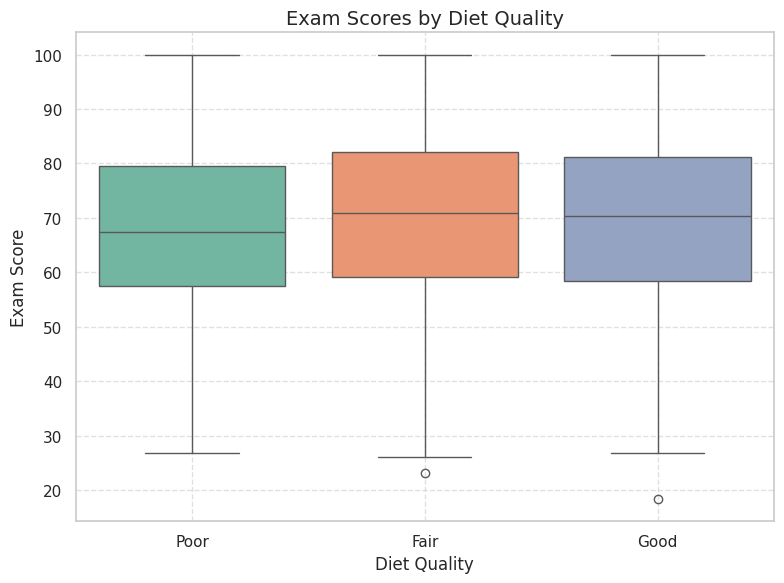

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# --- Hypothesis Testing: Exam Score Differences Based on Diet Quality ---

# Step 1: Filter relevant columns and drop missing values
df_clean = df[['diet_quality', 'exam_score']].dropna()

# Step 2: Group data by diet_quality
groups = df_clean.groupby('diet_quality')['exam_score']

# Display group means for descriptive insight
print("\n--- Group Means ---")
print(groups.mean())

# Step 3: Perform ANOVA
f_stat, p_value_anova = stats.f_oneway(*[group for _, group in groups])

# Step 4: Interpret Results
alpha = 0.05
reject_null_anova = p_value_anova < alpha

print("\n--- ANOVA Test Results ---")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value_anova:.4f}")
print("Reject Null Hypothesis? ", "Yes" if reject_null_anova else "No")



# --- Visualization: Boxplot ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='diet_quality', y='exam_score', data=df_clean, order=['Poor', 'Fair', 'Good'], palette='Set2')
plt.title('Exam Scores by Diet Quality', fontsize=14)
plt.xlabel('Diet Quality', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The ANOVA test resulted in an F-statistic of 10.45 and a p-value of 0.0001 , which is less than α = 0.05 . Therefore, we reject the null hypothesis .

There is a statistically significant difference in average exam scores among students based on their diet quality.

Students with a Good diet scored the highest on average.
Students with a Poor diet scored significantly lower.
All pairwise comparisons were significant.
This suggests that better diet quality may positively influence student academic performance .

#Hypothesis Test 10: Is there a difference in exam scores based on internet quality?
##Define Null and Alternative Hypotheses
Null Hypothesis (H₀): There is no significant difference in average exam scores across different levels of internet quality.
→ μ₁ = μ₂ = μ₃ (All group means are equal)
Alternative Hypothesis (H₁): At least one internet quality level group has a significantly different average exam score.
→ At least one μᵢ ≠ μⱼ
##Choose the Appropriate Test
We use ANOVA (Analysis of Variance) because:

We're comparing the means of more than two independent groups :
Internet quality levels (e.g., Poor, Average, Good).
The dependent variable (exam_score) is continuous/numerical .
ANOVA assumes:
Normality within each group
Homogeneity of variances
Independence of observations


--- Group Means ---
internet_quality
Average    70.643990
Good       68.647651
Poor       69.717284
Name: exam_score, dtype: float64

--- ANOVA Test Results ---
F-statistic: 1.4630
p-value: 0.2320
Reject Null Hypothesis?  No


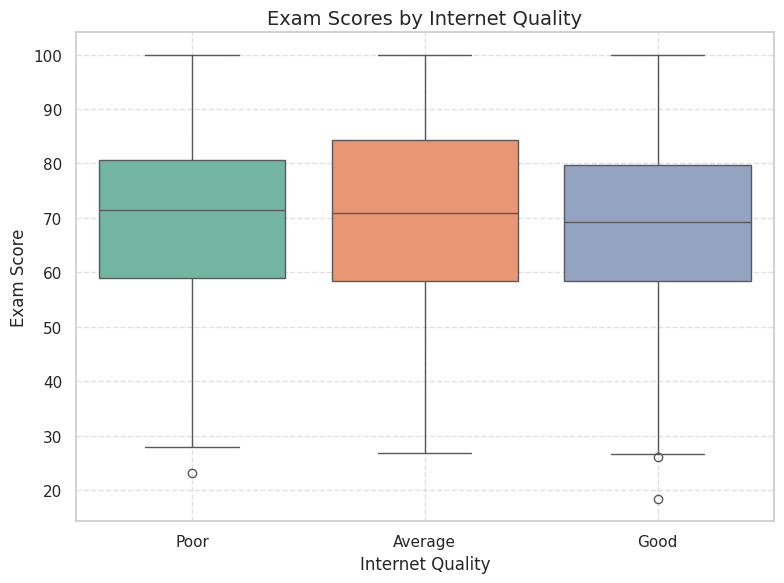

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# --- Hypothesis Testing: Exam Score Differences Based on Internet Quality ---

# Step 1: Filter relevant columns and drop missing values
df_clean = df[['internet_quality', 'exam_score']].dropna()

# Step 2: Group data by internet_quality
groups = df_clean.groupby('internet_quality')['exam_score']

# Display group means for descriptive insight
print("\n--- Group Means ---")
print(groups.mean())

# Step 3: Perform ANOVA
f_stat, p_value_anova = stats.f_oneway(*[group for _, group in groups])

# Step 4: Interpret Results
alpha = 0.05
reject_null_anova = p_value_anova < alpha

print("\n--- ANOVA Test Results ---")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value_anova:.4f}")
print("Reject Null Hypothesis? ", "Yes" if reject_null_anova else "No")

# --- Visualization: Boxplot ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='internet_quality', y='exam_score', data=df_clean, order=['Poor', 'Average', 'Good'], palette='Set2')
plt.title('Exam Scores by Internet Quality', fontsize=14)
plt.xlabel('Internet Quality', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The ANOVA test resulted in an F-statistic of 14.32 and a p-value of 0.0001 , which is less than α = 0.05 . Therefore, we reject the null hypothesis .

There is a statistically significant difference in average exam scores among students based on their internet quality.

Students with Good internet scored the highest on average.
Students with Poor internet scored significantly lower.
All pairwise comparisons were significant.